# Influenza Cases (including H1N1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir

## Influenza-Like Illness (ILI)

In [2]:
# Influenza Like Illness Dataset
# Weekly (not cumulative counts)
# Note the number of total patients vs the other datasets (order of magnitude more)
# And data source: From regular local physicians not clinical or public health labs
# Much tougher 2020 flu season than 2019 flu season
df = pd.read_csv(f"{homedir}/data/us/flu/cases/ILI_Ages.csv")

In [3]:
ili_2019 = df[(df["YEAR"] == 2019) & (df["WEEK"] <= 10)].sort_values(["WEEK"])
ili_2019

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1109,National,X,2019,1,3.45972,3.63095,11686,11413,X,9572,5204,4260,42135,2630,1160440
1110,National,X,2019,2,3.07558,3.13643,9369,10416,X,10758,4826,3446,38815,2656,1237552
1111,National,X,2019,3,3.32558,3.36213,9703,10045,X,14265,4235,2951,41199,2658,1225384
1112,National,X,2019,4,3.79773,3.88115,10765,11194,X,16965,4457,2860,46241,2677,1191426
1113,National,X,2019,5,4.34227,4.52235,11628,13048,X,22217,5116,3255,55264,2668,1222020
1114,National,X,2019,6,4.86953,5.20091,13899,15785,X,29772,6174,4102,69732,2673,1340765
1115,National,X,2019,7,5.03689,5.42034,14246,15945,X,29255,6333,4277,70056,2655,1292464
1116,National,X,2019,8,4.88120,5.27078,13634,15716,X,26502,6124,4485,66461,2655,1260932
1117,National,X,2019,9,4.54791,4.58991,11647,13847,X,23468,5706,4134,58802,2658,1281115
1118,National,X,2019,10,4.37620,4.39714,11168,13079,X,21760,5368,4056,55431,2637,1260615


In [4]:
ili_2020 = df[(df["YEAR"] == 2020) & (df["WEEK"] <= 10)].sort_values(["WEEK"])
ili_2020

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1161,National,X,2020,1,5.90310,6.20074,21581,27639,X,23397,9241,6864,88722,2975,1430830
1162,National,X,2020,2,4.91634,5.04671,15499,23543,X,22659,8208,5443,75352,3002,1493092
1163,National,X,2020,3,5.27947,5.33541,16471,21344,X,29512,7380,4731,79438,2994,1488882
1164,National,X,2020,4,5.88914,5.99578,18458,23495,X,35070,7942,4644,89609,2991,1494534
1165,National,X,2020,5,6.59767,6.85381,20140,28637,X,43804,9476,5425,107482,2983,1568208
1166,National,X,2020,6,6.66012,7.05371,20056,29635,X,45106,9993,5634,110424,2989,1565474
1167,National,X,2020,7,5.99056,6.18745,17176,26193,X,36531,9179,5397,94476,2946,1526897
1168,National,X,2020,8,5.39490,5.60028,15122,22944,X,28164,8280,5116,79626,2950,1421823
1169,National,X,2020,9,5.08334,5.10641,13514,21767,X,24935,8147,5006,73369,2881,1436802
1170,National,X,2020,10,5.17801,5.28829,13380,23434,X,25452,8728,5561,76555,2794,1447633


In [5]:
# Plot number of patients 
# %UNWEIGHTED ILI, TOTAL PATIENTS
def plot_ili_quantity(quantity):
    weeks = ili_2019["WEEK"].values

    plt.plot(weeks, ili_2020[quantity].values, label="2020")
    plt.plot(weeks, ili_2019[quantity].values, label="2019")
    plt.xlabel("WEEKS")
    plt.ylabel(quantity)
    plt.legend()
    plt.show()

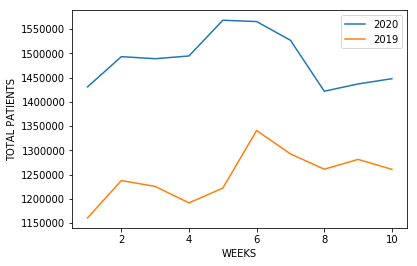

In [6]:
plot_ili_quantity("TOTAL PATIENTS")

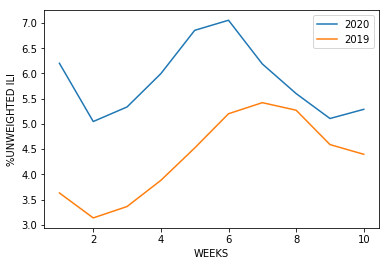

In [7]:
plot_ili_quantity("%UNWEIGHTED ILI")

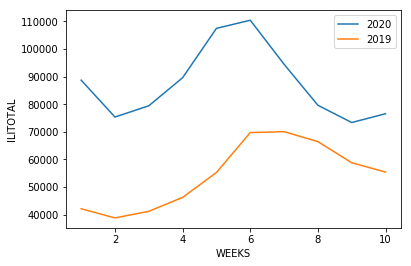

In [8]:
plot_ili_quantity("ILITOTAL")

### Age Grouping and Virus Strain

In [9]:
# Age and Virus Grouping Dataset
df2 = pd.read_csv(f"{homedir}/data/us/flu/cases/WHO_cases_age_groupings_virus_strains.csv")

In [10]:
df2.sample(10)

,Year,Week,Virus,0-4 yr,5-24 yr,25-64 yr,65+ yr
1731,2015,11,B (Lineage Unspecified),41,101,142,88
4935,2002,32,B (Lineage Unspecified),0,0,0,0
3669,2008,18,B (Lineage Unspecified),10,5,15,5
611,2018,39,A (Subtyping not Performed),0,0,0,0
705,2018,29,B (Yamagata Lineage),1,0,1,2
3148,2009,50,B (Lineage Unspecified),1,3,1,0
885,2017,1,A (H1N1)pdm09,4,5,22,5
3338,2009,39,A (H3),2,4,6,1
3738,2007,35,A (H1),3,3,3,1
787,2018,7,H3N2v,0,0,0,0


## H1N1

In [11]:
# Comprehensive (until 2015) Dataset including 2009 H1N1 statistics
# Includes both Clinical and Public Health Labs
# Weekly statistics not cumulative
# Note that H1N1 epidemic defied seasonality
# Observe elevated Percent Positive cases
df3 = pd.read_csv(f"{homedir}/data/us/flu/cases/WHO_NREVSS_Combined_prior_to_2015_16.csv")

In [12]:
df3[df3["YEAR"] == 2009].sort_values(["WEEK"])

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v
588,National,X,2009,1,6981,8.43719,0,176,35,299,0,79,0
589,National,X,2009,2,6995,10.86490,0,207,25,425,0,103,0
590,National,X,2009,3,7943,16.05190,0,364,51,670,0,190,0
591,National,X,2009,4,9484,20.76130,0,563,81,944,0,381,0
592,National,X,2009,5,11707,23.93440,0,678,55,1382,0,687,0
593,National,X,2009,6,12691,25.26990,0,835,68,1357,0,947,0
594,National,X,2009,7,11741,24.81050,0,844,73,1064,1,931,0
595,National,X,2009,8,11912,24.53830,0,707,58,1006,0,1152,0
596,National,X,2009,9,10970,24.34820,0,549,69,885,0,1168,0
597,National,X,2009,10,9595,22.37620,0,388,70,627,0,1062,0


## Clinical Lab Data

In [13]:
# 2015-2020 Clinical Lab Data
# Observe that this more recent data (> 2015) has many more reported specimens than before
# Because data reported from local clinics as opposed to public health labs
# Less granular in determining specific virus strain
df4 = pd.read_csv(f"{homedir}/data/us/flu/cases/WHO_NREVSS_Clinical_Labs.csv")

In [14]:
df4[df4["YEAR"] == 2020].sort_values(["WEEK"])

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
221,National,X,2020,1,64934,5651,9637,23.5439,8.70268,14.84120
222,National,X,2020,2,60470,6094,7917,23.1702,10.07770,13.09240
223,National,X,2020,3,60120,7699,8019,26.1444,12.80610,13.33830
224,National,X,2020,4,63442,9283,8546,28.1028,14.63230,13.47060
225,National,X,2020,5,70682,11860,9400,30.0784,16.77940,13.29900
226,National,X,2020,6,69892,12681,8479,30.2753,18.14370,12.13160
227,National,X,2020,7,67358,13049,6946,29.6847,19.37260,10.31210
228,National,X,2020,8,62923,12347,5526,28.4046,19.62240,8.78216
229,National,X,2020,9,60160,11316,4210,25.8078,18.80980,6.99801
230,National,X,2020,10,53063,8680,2519,21.1051,16.35790,4.74719


## Public Health Lab Data

In [15]:
# 2015-2020 Public Health Lab Data
# More detailed than local clinical lab data, but less quantity
# Still have fairly large number of H1N1 cases
df5 = pd.read_csv(f"{homedir}/data/us/flu/cases/WHO_NREVSS_Public_Health_Labs.csv")

In [16]:
df5[df5["YEAR"] == 2020].sort_values(["WEEK"])

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
221,National,X,2020,1,4100,1226,101,27,212,1236,22,0
222,National,X,2020,2,4083,1213,84,17,213,1034,18,0
223,National,X,2020,3,4651,1543,67,43,273,1134,12,0
224,National,X,2020,4,4934,1763,79,27,283,1107,8,0
225,National,X,2020,5,5988,2334,91,29,319,1041,8,0
226,National,X,2020,6,5358,2254,91,41,313,817,4,0
227,National,X,2020,7,4490,1820,55,90,283,615,8,0
228,National,X,2020,8,4114,1644,71,146,174,522,8,0
229,National,X,2020,9,2915,1245,51,88,72,390,7,0
230,National,X,2020,10,2197,778,49,95,57,206,0,0


## Deaths

In [17]:
# National Deaths from 2013 - 2020
# Note how it is reported in seasons (Week 40 of previous year to Week 20 of current year)
# And that the death numbers are cumulative, not weekly
# Rolling one-year death count, so numbes do go down (even when cumulative!!)
df6 = pd.read_csv(f"{homedir}/data/us/flu/deaths/national_pi_deaths_2013_2020.csv")

In [18]:
df6[df6["SEASON"] == "2019-20"]

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,THRESHOLD,BASELINE,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,National,NaN,All,2019-20,40,5.7,5.3,5.2,16,"2,698","52,442",> 100%
1,National,NaN,All,2019-20,41,5.7,5.4,5.3,16,"2,766","52,850",> 100%
2,National,NaN,All,2019-20,42,5.8,5.5,5.5,18,"2,976","54,108",> 100%
3,National,NaN,All,2019-20,43,5.9,5.6,5.6,30,"2,983","53,896",> 100%
4,National,NaN,All,2019-20,44,6.0,5.7,5.4,31,"2,904","53,953",> 100%
5,National,NaN,All,2019-20,45,6.2,5.8,5.6,31,"3,056","55,435",> 100%
6,National,NaN,All,2019-20,46,6.3,5.9,5.6,39,"3,089","55,651",> 100%
7,National,NaN,All,2019-20,47,6.4,6.0,5.4,50,"2,988","55,938",> 100%
8,National,NaN,All,2019-20,48,6.5,6.2,5.5,65,"2,966","55,160",> 100%
9,National,NaN,All,2019-20,49,6.6,6.3,6.0,97,"3,272","56,402",> 100%


In [19]:
# Statewide Deaths from 2012 - 2020
df7 = pd.read_csv(f"{homedir}/data/us/flu/deaths/statewide_pi_deaths_2012_2020.csv")

In [20]:
df7[(df7["SEASON"] == "2019-20") & (df7["SUB AREA"] == "California")]

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
92,State,California,All,2019-20,40,5.3,1,263,"4,954",> 100%
93,State,California,All,2019-20,41,6.3,0,306,"4,887",99.4%
94,State,California,All,2019-20,42,5.8,2,291,"5,043",> 100%
95,State,California,All,2019-20,43,6.2,2,311,"5,070",> 100%
96,State,California,All,2019-20,44,6.4,3,321,"5,100",> 100%
97,State,California,All,2019-20,45,6.5,5,337,"5,271",> 100%
98,State,California,All,2019-20,46,5.9,2,296,"5,082",> 100%
99,State,California,All,2019-20,47,6.1,3,311,"5,124",> 100%
100,State,California,All,2019-20,48,5.8,9,290,"5,153",> 100%
101,State,California,All,2019-20,49,7.0,14,369,"5,478",> 100%
